## Homework 2: Data structures and data cleaning

In this homework you will have to apply the knowledge you have learned about tidy data from reading Wickham (2014). You will have to identify problems with the organization of example datasets using the terms introduced in Wickham. You will also have to tidy a dataset, and perform some basic cleaning operations. 

Before you begin, you will need to have completed the following requirements:
- Read Wickham (2014)
- If you haven't worked with the tidyverse package before, you need to install it with the `install.packages('tidyverse')` command
- Consult Tutorial 2, which explains the basic tidyverse commands for processing data: https://github.com/venpopov/DataSciencePsychUZH/blob/main/Tutorials/Tutorial02_Data_processing_with_R_and_tidyverse.ipynb

*Copy this notebook, the folder `data` and the folder `figures` in your repository, and type in your responses and/or code in the corresponding cells. Your homework will be scored based on the total number of points (30 total possible).*

Clarification: to copy the relevant files into your repository, you first need to download them to your computer. You can do that one of two ways. First, you can open a terminal and type `git clone https://github.com/venpopov/DataSciencePsychUZH`. This will copy the entire class repository on your local computer. Then you can locate the homework2 notebook, and the data/figures folders. Then you can copy and paste them into your own repository.

Alternatively, you can directly download all files from the repository by going to the main repository page on your browser and clicking on `Code > Download ZIP` as shown in the image below. This will download all repository files into a ZIP archive on your computer. Extract the files from the archive into a new folder. Then copy and paste the homework2 notebook, and the data/figures folders into your repository.

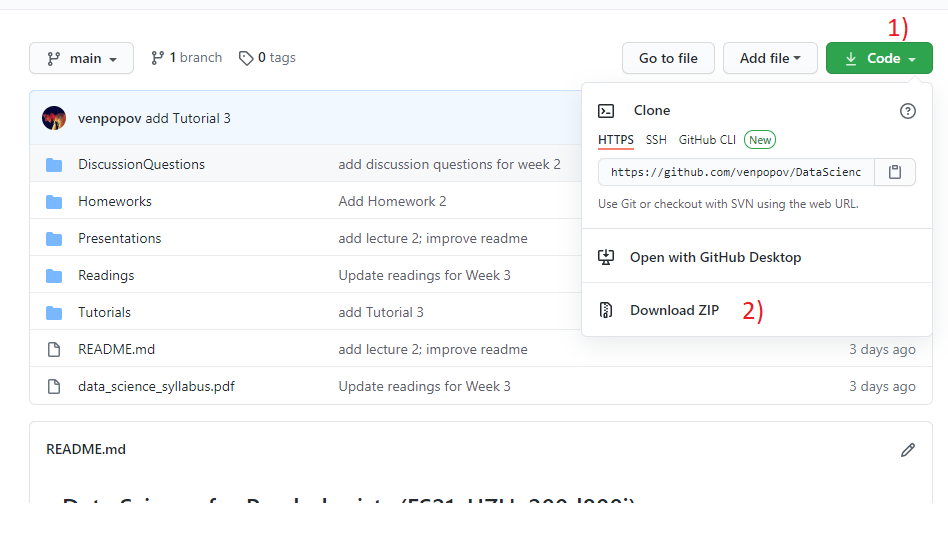


### 1. Identifying non-tidy datasets



Installing'tidyverse'

In [9]:
install.packages('tidyverse')



The downloaded binary packages are in
	/var/folders/vv/vsfn7tfx5bg_y1mqcbk1hg400000gn/T//RtmpiH2LBf/downloaded_packages


library the loaded package

In [17]:
library(tidyverse)

#### 1.1 Problem 1
The dataset below shows demographic information, IQ and college grade point average for several students

In [18]:
iq_grade <- read.csv('data/iq_grade.csv')
iq_grade

subject_id,demographic_info,verbal_IQ,GPA
<int>,<fct>,<int>,<dbl>
101,"male, 23",105,3.9
102,"male, 19",121,3.2
103,"female, 27",123,3.4
104,"male, 21",97,2.8
105,"female, 21",93,2.9
106,"female, 25",135,3.8


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> Multiple variables are stored in one column

What would you have to do to make this dataset in tidy format? **(1 point)**
> I would split the column demoraphic_infot into the variables: sex and age

Write code in the cell below to transform the `iq_grades` table into tidy format 

(hint: use the separate() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [12]:
 iq_grade_sep <- iq_grade %>% separate(demographic_info, into=c('sex','age')) 
head(iq_grade_sep)

,subject_id,sex,age,verbal_IQ,GPA
,<int>,<chr>,<chr>,<int>,<dbl>
1,101,male,23,105,3.9
2,102,male,19,121,3.2
3,103,female,27,123,3.4
4,104,male,21,97,2.8
5,105,female,21,93,2.9
6,106,female,25,135,3.8


#### 1.2 Problem 2
The dataset below shows statistics about violent crime rates by US state. The numbers represent frequency per 100,000 people. 

In [13]:
suppressMessages(library(tidyverse))

data("USArrests")
USArrests <- select(USArrests, -UrbanPop)
head(USArrests)

,Murder,Assault,Rape
,<dbl>,<int>,<dbl>
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7


This dataset is not in a tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:

> Variables are stored in both, rows and columns

What would you have to do to make this dataset in tidy format? **(1 point)**
> I would transform the data into the long format. So, I would transform the colums (murder, assault, rape) into one variable (type of crime) and add a new variable (frequency)

Write code in the cell below to transform the `USArrests` table into tidy format 

(hint: use the gather() command from the tidyverse package - see Tutorial 2; **3 points**): 

In [91]:

USArrests_new <- USArrests %>% 
gather(key = 'type of crime', value = 'frequency',Murder, Assault, Rape)
head(USArrests_new)

#I did not manage to create a column state
#Furthermore I do not understand whay it shows me just the first 6 rows of the data, 
#I had this problem throughout the homework

,type of crime,frequency
,<chr>,<dbl>
1,Murder,13.2
2,Murder,10.0
3,Murder,8.1
4,Murder,8.8
5,Murder,9.0
6,Murder,7.9


#### 1.3 Problem 3

The three tables below give the measurements in centimeters of the variables sepal length, sepal width, petal length and petal width, respectively, for 50 flowers from each of 3 species of iris flowers. The species are setosa, versicolor, and virginica.

In [92]:
# load data
setosa <- read.csv('data/setosa.csv')
virginica <- read.csv('data/virginica.csv')
versicolor <- read.csv('data/versicolor.csv')

# look at the data
head(setosa)
head(virginica)
head(versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.3,3.3,6.0,2.5
2,5.8,2.7,5.1,1.9
3,7.1,3.0,5.9,2.1
4,6.3,2.9,5.6,1.8
5,6.5,3.0,5.8,2.2
6,7.6,3.0,6.6,2.1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.0,3.2,4.7,1.4
2,6.4,3.2,4.5,1.5
3,6.9,3.1,4.9,1.5
4,5.5,2.3,4.0,1.3
5,6.5,2.8,4.6,1.5
6,5.7,2.8,4.5,1.3


These tables are not in tidy format. Why? Which of the five most common problems described by Wickhams is this an example of? Edit this cell and replace the text below with your response **(1 point)**:
> A single observational unit is stored in multiple tables.

What would you have to do to make this dataset in tidy format? **(1 point)**
> I would combine the 3 tables into one table.

Write code in the cell below to transform the `setosa`, `virginica` and `versicolor` tables into tidy format 

(hint: use the `bind_rows()` command from the tidyverse package; remember to include information about the species in tidy dataset; **3 points**): 

In [93]:
bind_rows(list('setosa' = setosa, 'virginica' = virginica, 'versicolor'= versicolor ),.id = 'flowers')

#here it shows the full data frame, but if i assign it to a new name, again I see just the first 6 rows 

flowers,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


### 2. Putting it all together

The files `basel_weather_2018.csv`, `basel_weather_2019.csv`, `basel_weather_2020.csv` in the folder `data` contain detailed information about the minimum, mean and maximum temperature in Basel, Switzerland for every hour of every day of the last three years.

The datasets have multiple structural issues. Combine your knowledge from the previous 3 problems to transform these datasets into a tidy format. The tidy format should allow you at the end to produce two plots:
1. average mean temperature as a function of a time of day
2. average maximum temperature as a function of month

When you are done, you should be able to produce the following two plots:

![max_temperature_plot](figures/basel_temp_by_month.png)
![mean_temperature_plot](figures/basel_temp_by_time_of_day.png)

First load the three dataset into three separate variables **(1 point)**:

In [94]:
#load data
basel_2018 <- read.csv('data/basel_weather_2018.csv')
basel_2019 <- read.csv('data/basel_weather_2019.csv')
basel_2020 <- read.csv('data/basel_weather_2020.csv')

Use the `head()` command to take a look at the first few rows of each dataset **(1 point)**:

In [95]:
#look at the data
head(basel_2018)
head(basel_2019)
head(basel_2020)

,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20180101T0000,temperature_mean,10.500529
2,20180101T0000,temperature_min,7.500529
3,20180101T0000,temperature_max,15.500529
4,20180101T0100,temperature_mean,9.790529
5,20180101T0100,temperature_min,5.790529
6,20180101T0100,temperature_max,13.790529


,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20190101T0000,temperature_mean,5.0505285
2,20190101T0000,temperature_min,0.0505285
3,20190101T0000,temperature_max,9.0505285
4,20190101T0100,temperature_mean,4.9005284
5,20190101T0100,temperature_min,2.9005284
6,20190101T0100,temperature_max,8.9005284


,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20200101T0000,temperature_mean,1.4905287
2,20200101T0000,temperature_min,0.4905287
3,20200101T0000,temperature_max,3.4905287
4,20200101T0100,temperature_mean,1.6905286
5,20200101T0100,temperature_min,0.6905286
6,20200101T0100,temperature_max,6.6905286


Use the `bind_rows()` command to combine the three datasets into one **(1 point)**:

In [96]:
basel_new <- bind_rows(basel_2018, basel_2019, basel_2020)
head(basel_new)
# the same here, if i do not assign it the a new name, I see the full data

,timestamp,temperature_type,temperature
,<fct>,<fct>,<dbl>
1,20180101T0000,temperature_mean,10.500529
2,20180101T0000,temperature_min,7.500529
3,20180101T0000,temperature_max,15.500529
4,20180101T0100,temperature_mean,9.790529
5,20180101T0100,temperature_min,5.790529
6,20180101T0100,temperature_max,13.790529


Use the `spread()` command to transform the dataset such that the mean, maximum, and minimum temperatures are in separate columns **(2 points)**:

In [97]:
#separate mean, maximum and minimum
basel_new_sep <- basel_new %>% spread(temperature_type, temperature)
head(basel_new_sep)

,timestamp,temperature_max,temperature_mean,temperature_min
,<fct>,<dbl>,<dbl>,<dbl>
1,20180101T0000,15.500529,10.500529,7.500529
2,20180101T0100,13.790529,9.790529,5.790529
3,20180101T0200,9.970529,8.970529,6.970529
4,20180101T0300,11.690529,8.690529,5.690529
5,20180101T0400,11.960528,7.960528,6.960528
6,20180101T0500,9.360528,7.360529,3.360529


The variable `timestamp` contains in each row a single string that represents the year, month, day and time of day in a single value. For example, `20200708T0700` means that the temperature in this row was observed on July 8th, 2020 at 7am. Create four new columns in your combined dataset:
- Year
- Month
- Day
- Hour

and use the `substr()` command to extract the relevant information for each column from the `timestamp` variable. For example, `substr(temp_data$timestamp, 7, 8)` would extract the day from the timestamp. 

If you need help understanding the `substr()` command, [read this](https://stat.ethz.ch/R-manual/R-devel/library/base/html/substr.html)  **(2 points)**:

In [98]:
#extract information from the timestamp
basel2 <- data.frame(year = substr(basel_new_sep$timestamp,1,stop=4), month = substr(basel_new_sep$timestamp,5,6),
                     day = substr(basel_new_sep$timestamp,7,8), hour = substr(basel_new_sep$timestamp,10, stop=13))
head(basel2) 
basel3 <- select(basel_new_sep, - timestamp)
head(basel3)
basel_final <- bind_cols(basel2, basel3)
head(basel_final)

#In the code above I tried to use the pipe here, but it didn't work out


,year,month,day,hour
,<fct>,<fct>,<fct>,<fct>
1,2018,01,01,0000
2,2018,01,01,0100
3,2018,01,01,0200
4,2018,01,01,0300
5,2018,01,01,0400
6,2018,01,01,0500


,temperature_max,temperature_mean,temperature_min
,<dbl>,<dbl>,<dbl>
1,15.500529,10.500529,7.500529
2,13.790529,9.790529,5.790529
3,9.970529,8.970529,6.970529
4,11.690529,8.690529,5.690529
5,11.960528,7.960528,6.960528
6,9.360528,7.360529,3.360529


,year,month,day,hour,temperature_max,temperature_mean,temperature_min
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,2018,01,01,0000,15.500529,10.500529,7.500529
2,2018,01,01,0100,13.790529,9.790529,5.790529
3,2018,01,01,0200,9.970529,8.970529,6.970529
4,2018,01,01,0300,11.690529,8.690529,5.690529
5,2018,01,01,0400,11.960528,7.960528,6.960528
6,2018,01,01,0500,9.360528,7.360529,3.360529


Create a new dataset `monthly_temp` using the `group_by()` and `summarise()` commands (see Tutorial 2, Section 5). The new dataset should contain the average maximum temperature for each month. It should have 12 rows and two variables - `month` and `max_temperature`. **(2 points)**

In [99]:
monthly_temp <-  select(basel_final,- day, -hour, -temperature_mean, - temperature_min) 
head(monthly_temp) 

monthly_temp1 <- monthly_temp %>% group_by(month) %>%
summarise(Av_Temp = mean(temperature_max))
head(monthly_temp1)


,year,month,temperature_max
,<fct>,<fct>,<dbl>
1,2018,01,15.500529
2,2018,01,13.790529
3,2018,01,9.970529
4,2018,01,11.690529
5,2018,01,11.960528
6,2018,01,9.360528


month,Av_Temp
<fct>,<dbl>
01,7.891313
02,8.284421
03,10.869633
04,16.536487
05,18.150847
06,22.937376


In [37]:
?summarise


What I don't understand in the code above: if don't assing the newly structured data set to a new variable it shows me the right output (12x2), but I can't continue because it does not find the variable 'Av_Temp' in the command 'ggplot'.

Use the `ggplot()` command on your newly created `monthly_temp` summarized dataset to reproduce the first plot above. The x axis should show the month, and the y axis should show the average maximum temperature for each month. **(2 points)**

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



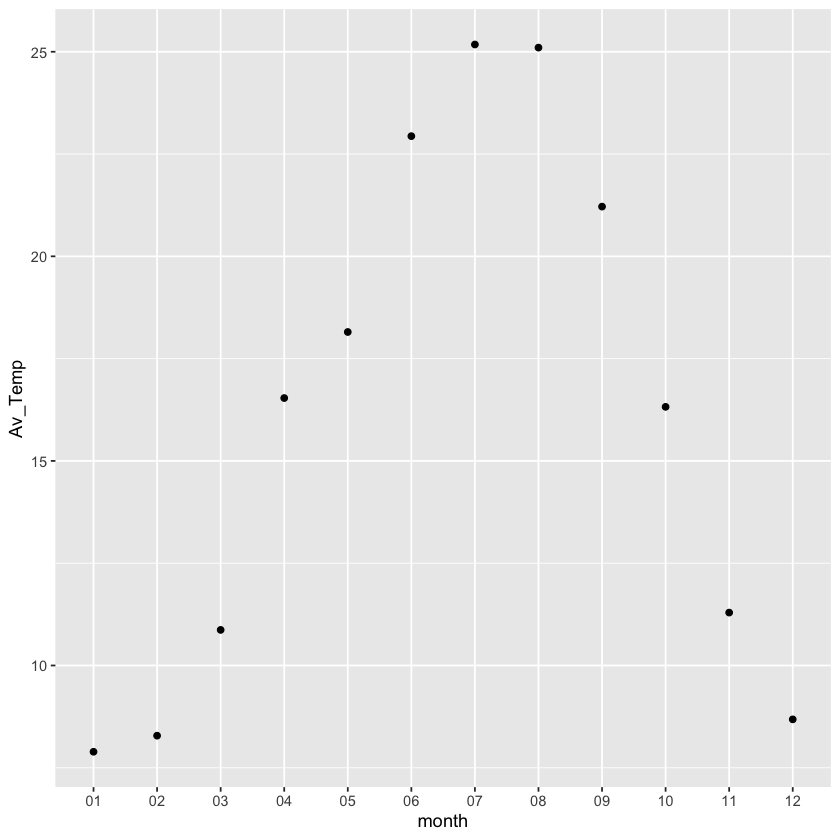

In [85]:
ggplot(monthly_temp1, aes(x = month, y = Av_Temp))+ geom_point() + geom_line()

#I could't figure out why I did not get a line with '+geom_line', the same happened inthe next plot

In [86]:
?ggplot


Create a new dataset `hourly_temp` using the `group_by()` and `summarise()` commands. The new dataset should contain the average mean temperature for each hour. It should have 24 rows and two variables - `hour` and `mean_temperature`. **(2 points)**

In [62]:
hourly_temp <-  select(basel_final,- day, -month, -temperature_max, - temperature_min) 
head(hourly_temp) 

hourly_temp1  <- hourly_temp %>% group_by(hour) %>%
summarise(av_mean_temp = mean(temperature_mean))
head(hourly_temp)


,year,hour,temperature_mean
,<fct>,<fct>,<dbl>
1,2018,0000,10.500529
2,2018,0100,9.790529
3,2018,0200,8.970529
4,2018,0300,8.690529
5,2018,0400,7.960528
6,2018,0500,7.360529


,year,hour,temperature_mean
,<fct>,<fct>,<dbl>
1,2018,0000,10.500529
2,2018,0100,9.790529
3,2018,0200,8.970529
4,2018,0300,8.690529
5,2018,0400,7.960528
6,2018,0500,7.360529


Use the `ggplot()` command on your newly created `hourly_temp` summarized dataset to reproduce the second plot above. The x axis should show the time of day (hour), and the y axis should show the average mean temperature for each time of day. **(2 points)**

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



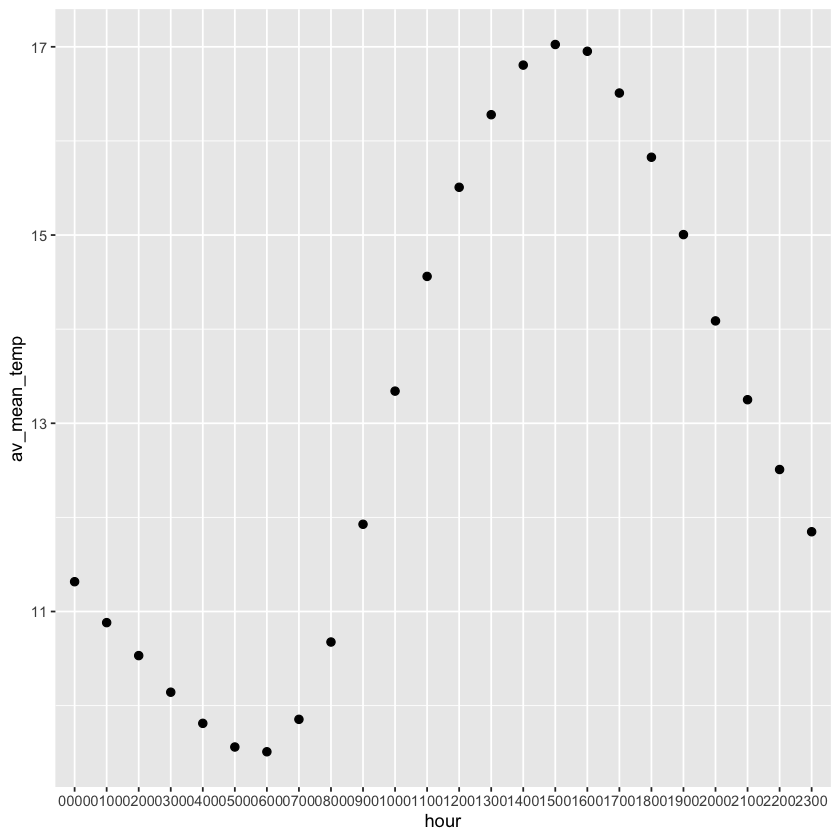

In [88]:
ggplot(hourly_temp1, aes(x = hour, y = av_mean_temp))+ geom_point(size=2) + geom_line()